Multi layer perceptron

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)                         #immagini di 28x28 pixel => ogni esempio con 784 proprietà


In [14]:
#ogni input di una rete neurale necessita un range tra 0 e 1 -> normalizziamo
mms = MinMaxScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

E' necessario utilizzare una rete neurale?

In [17]:
#eseguo una semplice regressione logistica come prima cosa
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=500)
lr.fit(X_train, Y_train)

y_pred_train = lr.predict(X_train)
y_prob_train = lr.predict_proba(X_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))        #preformance non mali

ACCURACY: TRAIN=0.9388 TEST=0.9262
LOG LOSS: TRAIN=0.2228 TEST=0.2720


Proviamo una rete neurale

In [19]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), verbose=True)        #100 nodi con un unico hidden layer, verbose per visualizzare l'addestram dinamico
mlp.fit(X_train, Y_train)                   #raggiunge il termine dopo 56 epoche 

Iteration 1, loss = 0.44034335
Iteration 2, loss = 0.20235391
Iteration 3, loss = 0.15318791
Iteration 4, loss = 0.12253853
Iteration 5, loss = 0.10133133
Iteration 6, loss = 0.08616303
Iteration 7, loss = 0.07397908
Iteration 8, loss = 0.06423500
Iteration 9, loss = 0.05650745
Iteration 10, loss = 0.04999009
Iteration 11, loss = 0.04427173
Iteration 12, loss = 0.03894219
Iteration 13, loss = 0.03499610
Iteration 14, loss = 0.03064007
Iteration 15, loss = 0.02750904
Iteration 16, loss = 0.02436474
Iteration 17, loss = 0.02166640
Iteration 18, loss = 0.01916411
Iteration 19, loss = 0.01774430
Iteration 20, loss = 0.01484961
Iteration 21, loss = 0.01330527
Iteration 22, loss = 0.01210872
Iteration 23, loss = 0.01020041
Iteration 24, loss = 0.00964364
Iteration 25, loss = 0.00819683
Iteration 26, loss = 0.00687521
Iteration 27, loss = 0.00669539
Iteration 28, loss = 0.00636637
Iteration 29, loss = 0.00574650
Iteration 30, loss = 0.00581471
Iteration 31, loss = 0.00433082
Iteration 32, los

MLPClassifier(verbose=True)

In [20]:
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)

y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))        #possibile overfitting dai risultati

ACCURACY: TRAIN=1.0000 TEST=0.9792
LOG LOSS: TRAIN=0.0003 TEST=0.1047


Proviamo una rete neurale profonda (più di uno strato)

In [21]:
mlp = MLPClassifier(hidden_layer_sizes=(512,512,), verbose=True)        #2 strati con 512 neuroni ciascuno
mlp.fit(X_train, Y_train)  

Iteration 1, loss = 0.24558425
Iteration 2, loss = 0.08680724
Iteration 3, loss = 0.05412590
Iteration 4, loss = 0.03667037
Iteration 5, loss = 0.02747368
Iteration 6, loss = 0.02010041
Iteration 7, loss = 0.01541285
Iteration 8, loss = 0.01533223
Iteration 9, loss = 0.01354916
Iteration 10, loss = 0.01138204
Iteration 11, loss = 0.01075030
Iteration 12, loss = 0.01314572
Iteration 13, loss = 0.00964109
Iteration 14, loss = 0.01038693
Iteration 15, loss = 0.00853015
Iteration 16, loss = 0.00546736
Iteration 17, loss = 0.01002485
Iteration 18, loss = 0.00835619
Iteration 19, loss = 0.00935001
Iteration 20, loss = 0.00622832
Iteration 21, loss = 0.00684731
Iteration 22, loss = 0.00670344
Iteration 23, loss = 0.00865670
Iteration 24, loss = 0.00643072
Iteration 25, loss = 0.00546167
Iteration 26, loss = 0.00929730
Iteration 27, loss = 0.00729134
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(512, 512), verbose=True)

In [22]:
y_pred_train = mlp.predict(X_train)
y_prob_train = mlp.predict_proba(X_train)

y_pred = mlp.predict(X_test)
y_prob = mlp.predict_proba(X_test)

accuracy_train = accuracy_score(Y_train, y_pred_train)
accuracy_test = accuracy_score(Y_test, y_pred)

loss_train = log_loss(Y_train, y_prob_train)
loss_test = log_loss(Y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))                #meglio di quello di prima

ACCURACY: TRAIN=0.9991 TEST=0.9833
LOG LOSS: TRAIN=0.0028 TEST=0.0952


numero 4 scambiato con 9


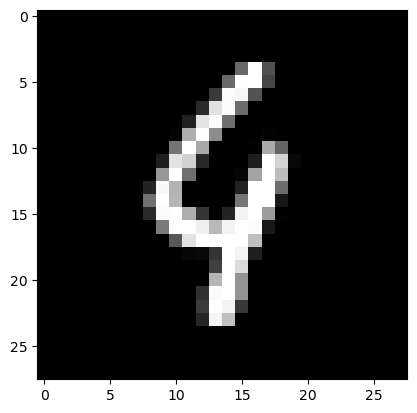

numero 2 scambiato con 9


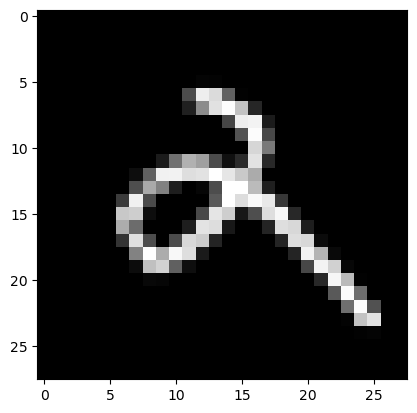

numero 6 scambiato con 5


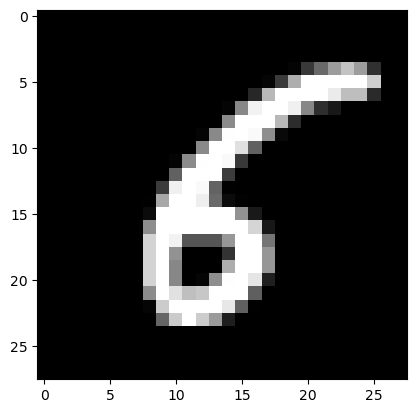

numero 4 scambiato con 2


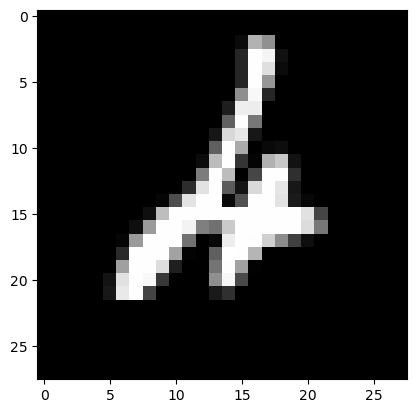

numero 8 scambiato con 0


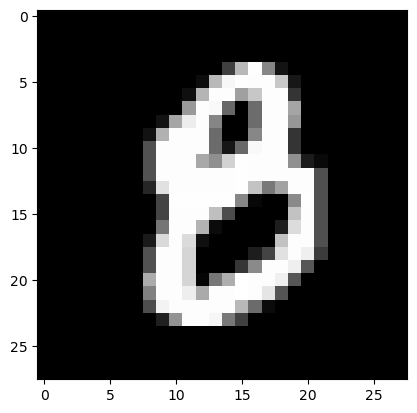

numero 2 scambiato con 7


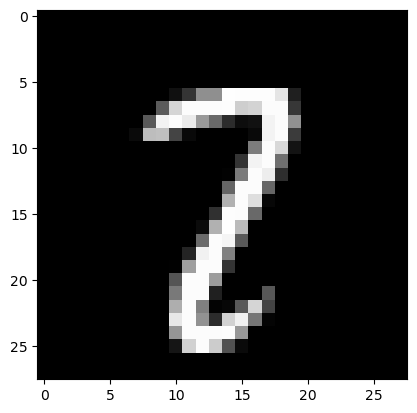

numero 5 scambiato con 3


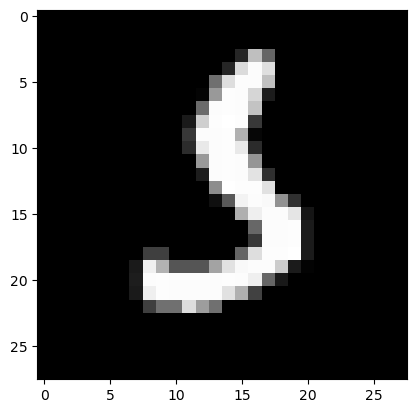

numero 6 scambiato con 0


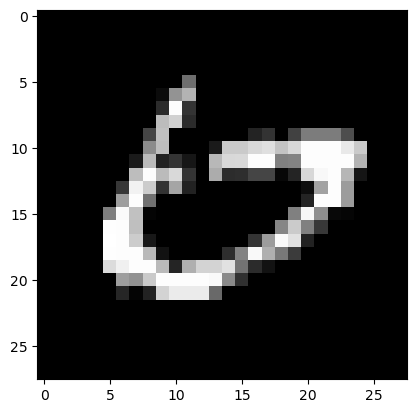

numero 8 scambiato con 0


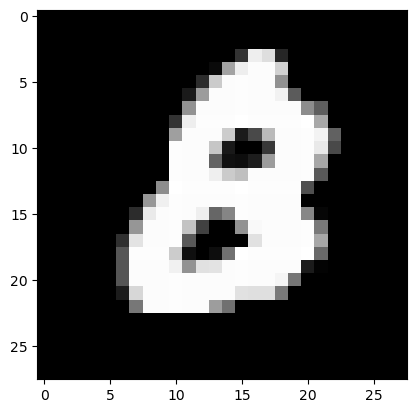

numero 5 scambiato con 3


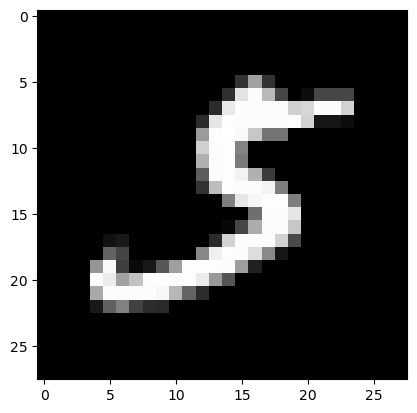

numero 8 scambiato con 2


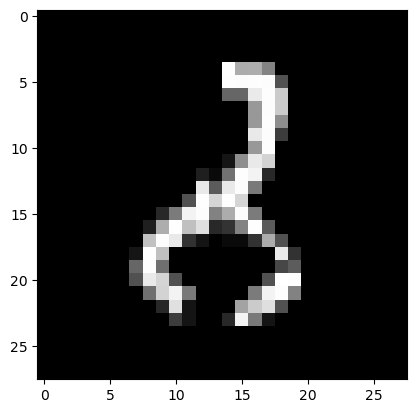

numero 8 scambiato con 3


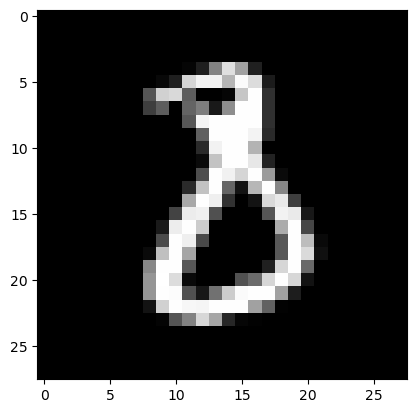

numero 7 scambiato con 2


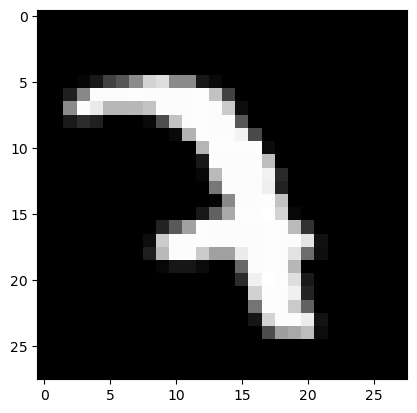

numero 8 scambiato con 4


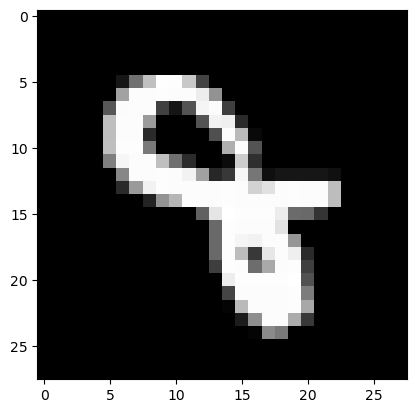

numero 5 scambiato con 8


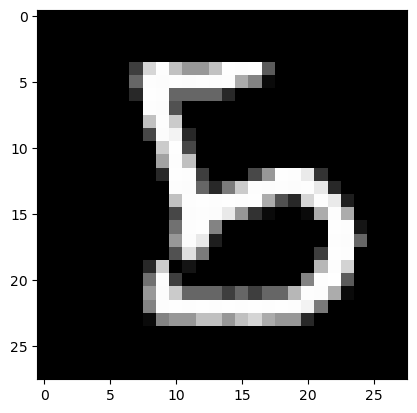

numero 1 scambiato con 3


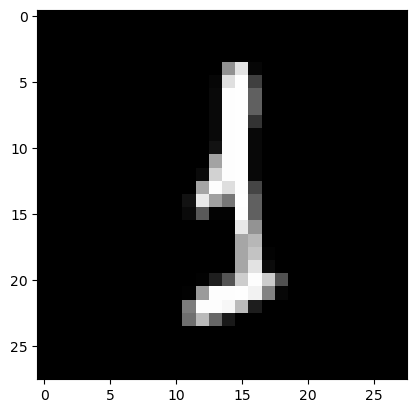

numero 8 scambiato con 9


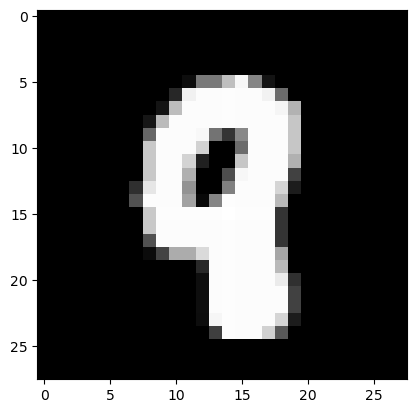

numero 5 scambiato con 4


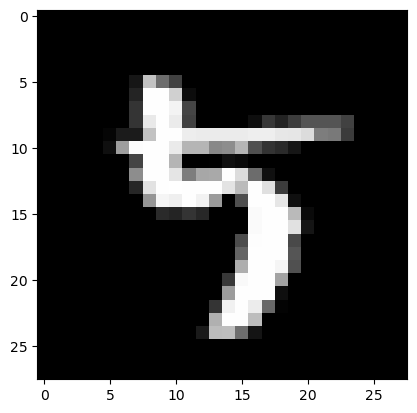

numero 1 scambiato con 3


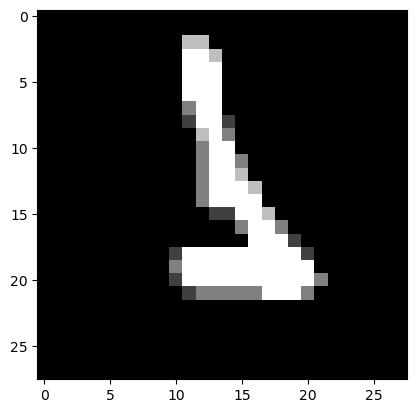

numero 6 scambiato con 0


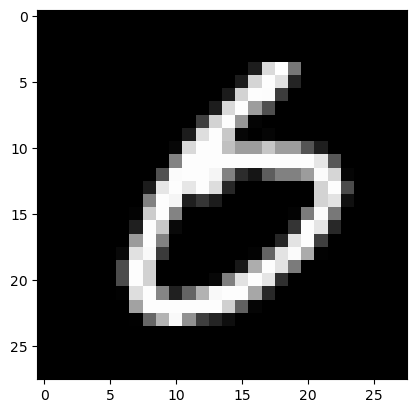

numero 5 scambiato con 3


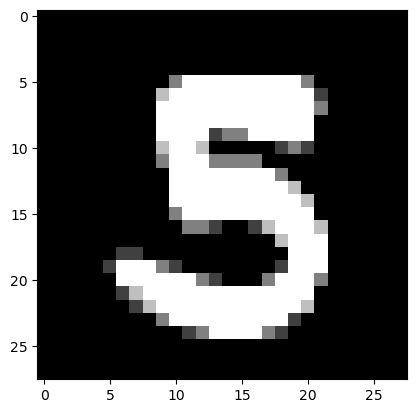

numero 6 scambiato con 5


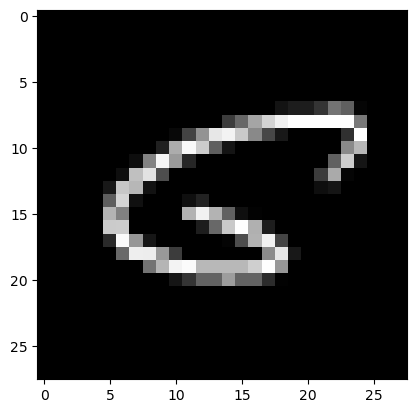

numero 7 scambiato con 2


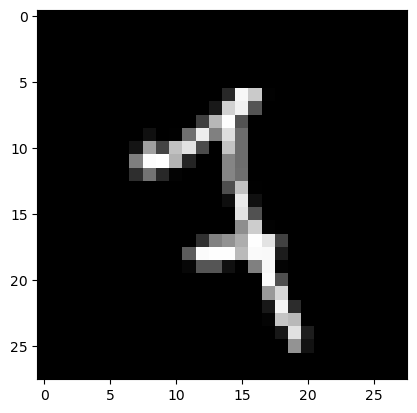

numero 6 scambiato con 8


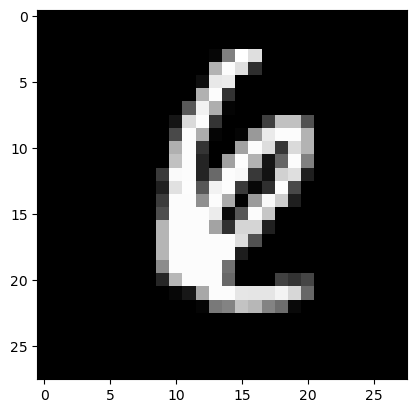

numero 4 scambiato con 6


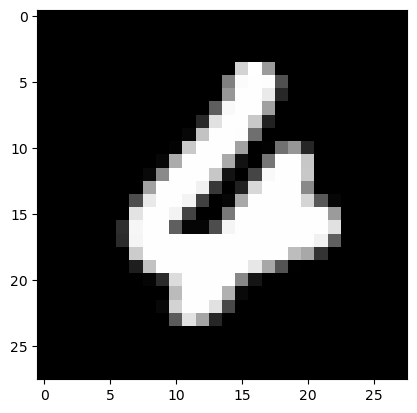

numero 7 scambiato con 8


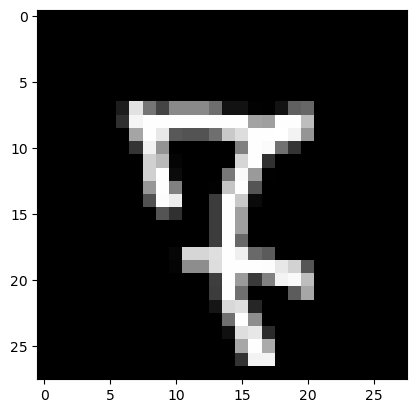

numero 7 scambiato con 9


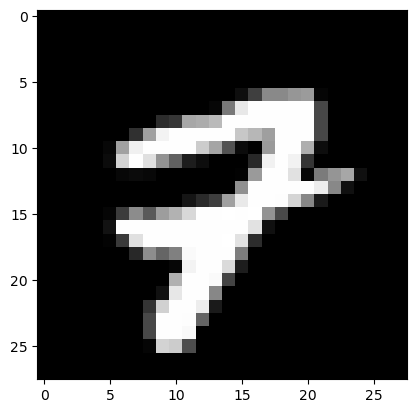

numero 7 scambiato con 2


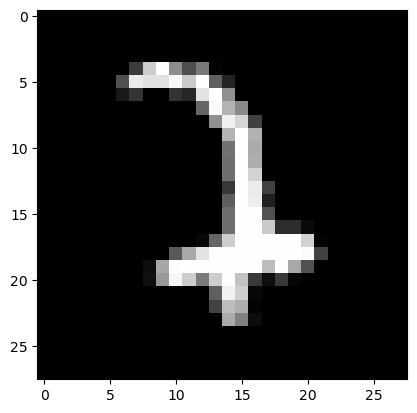

numero 9 scambiato con 4


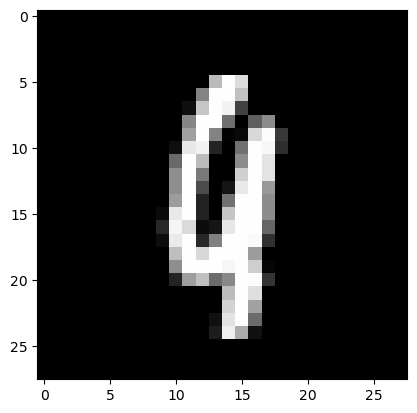

numero 9 scambiato con 5


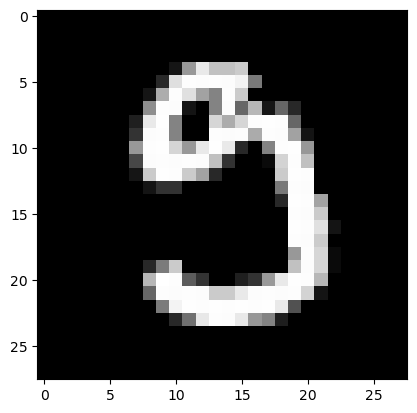

numero 5 scambiato con 7


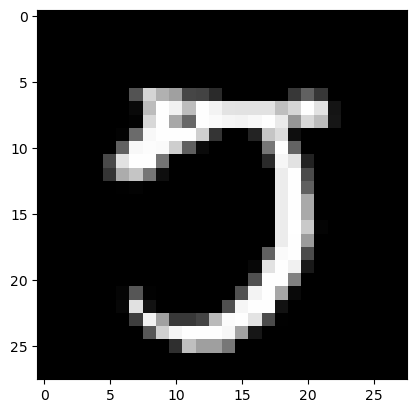

numero 8 scambiato con 3


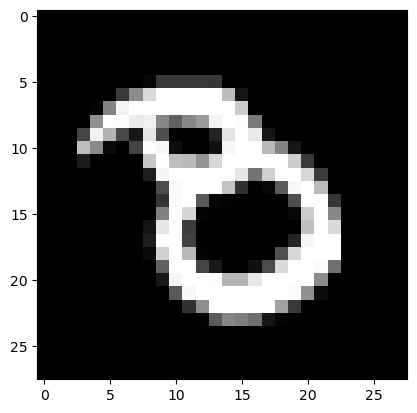

numero 7 scambiato con 9


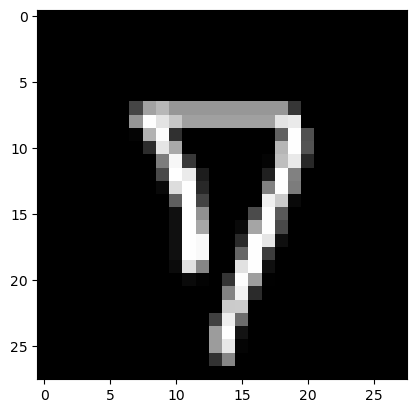

numero 5 scambiato con 3


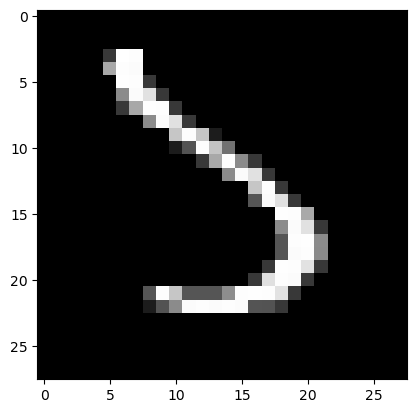

numero 7 scambiato con 0


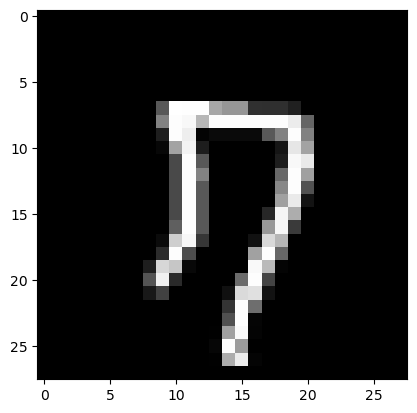

numero 7 scambiato con 9


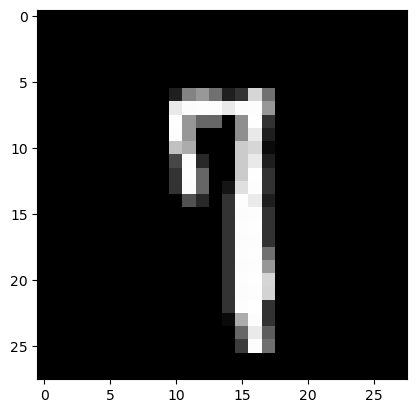

numero 8 scambiato con 7


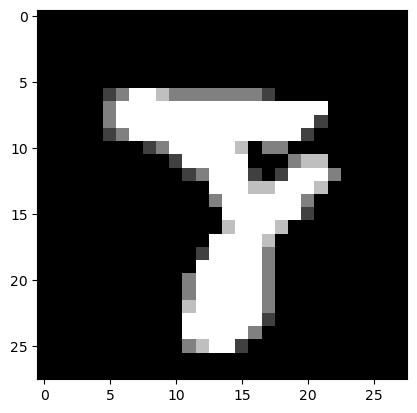

numero 7 scambiato con 3


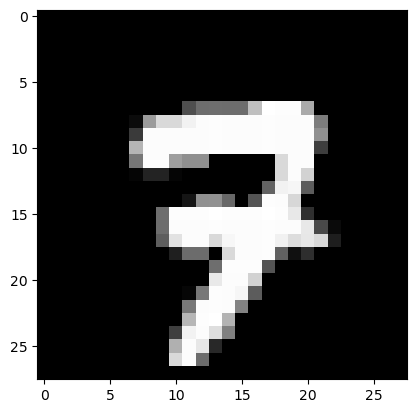

numero 4 scambiato con 6


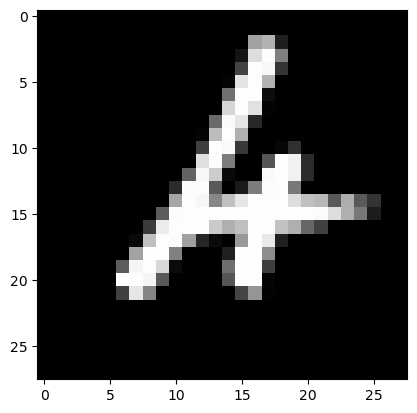

numero 2 scambiato con 3


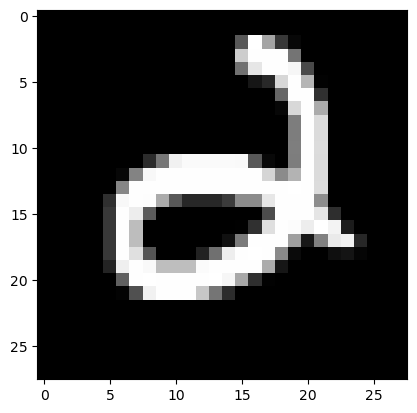

numero 5 scambiato con 6


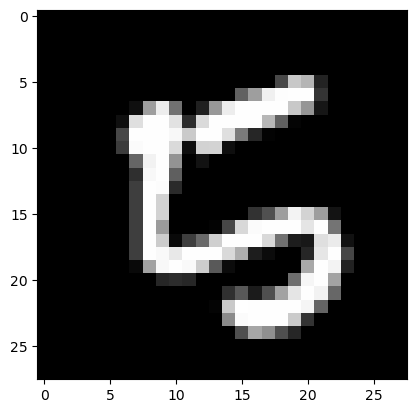

numero 8 scambiato con 3


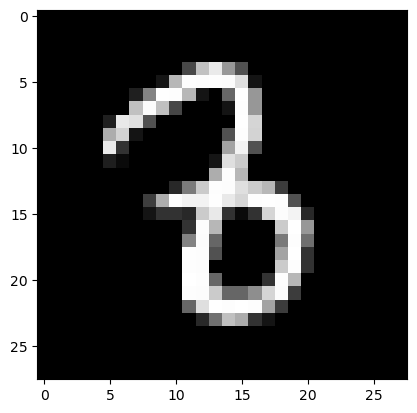

numero 9 scambiato con 4


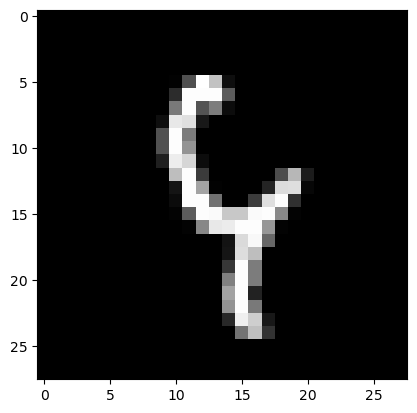

numero 5 scambiato con 6


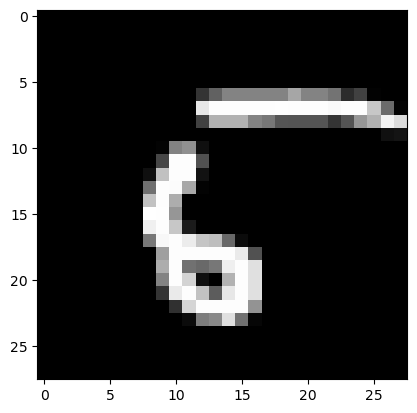

numero 7 scambiato con 8


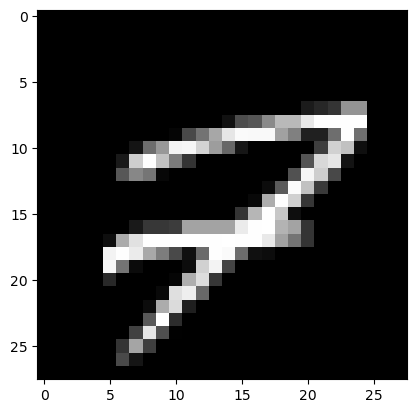

numero 6 scambiato con 5


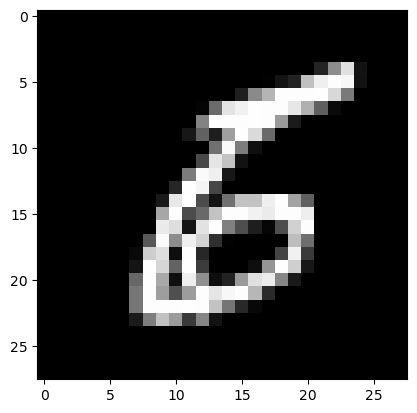

numero 8 scambiato con 3


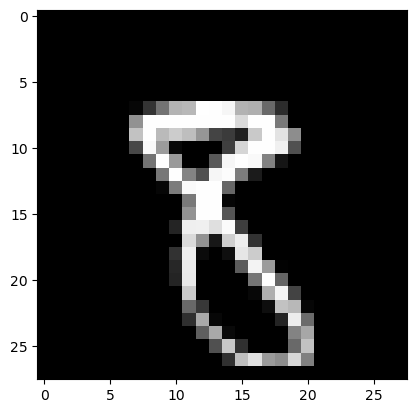

numero 7 scambiato con 9


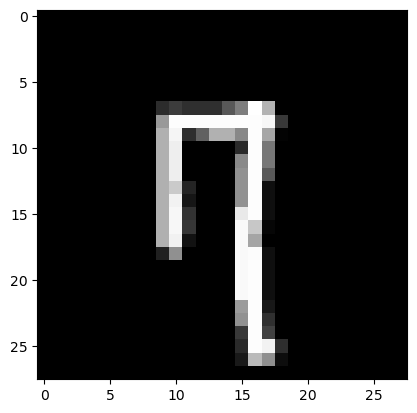

numero 5 scambiato con 3


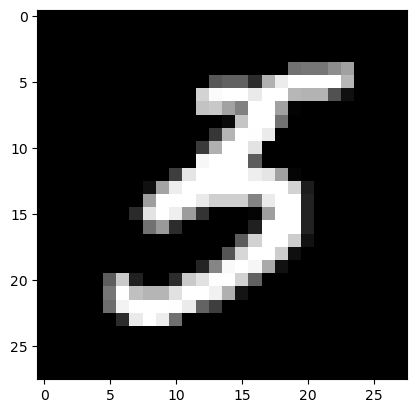

numero 3 scambiato con 2


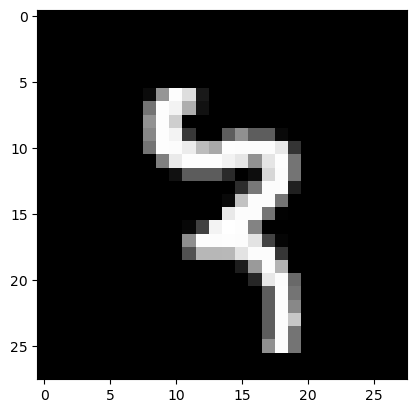

numero 6 scambiato con 4


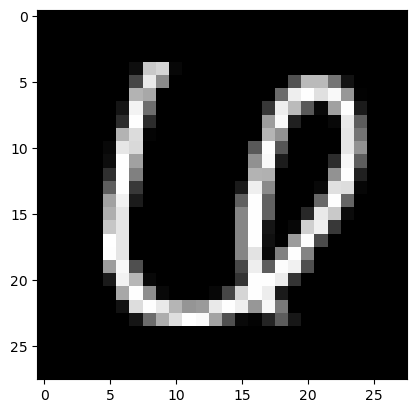

numero 9 scambiato con 8


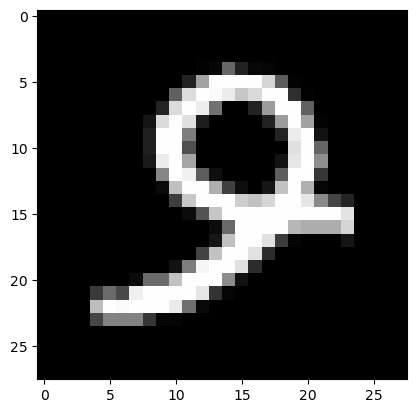

numero 4 scambiato con 9


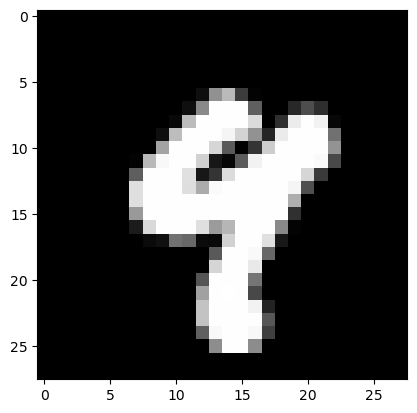

numero 6 scambiato con 1


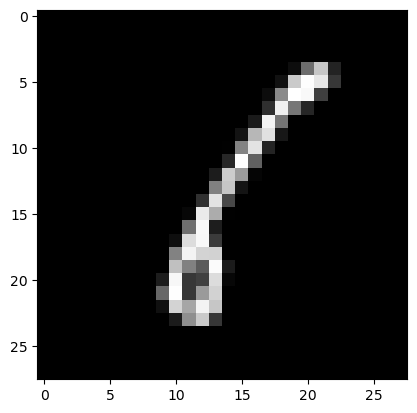

numero 8 scambiato con 0


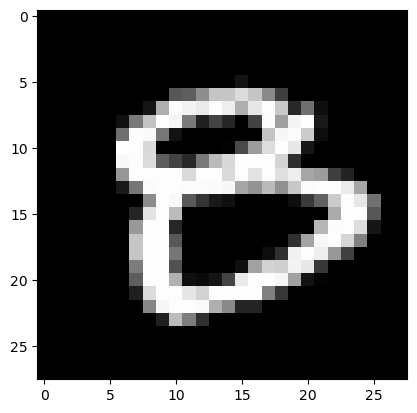

numero 9 scambiato con 4


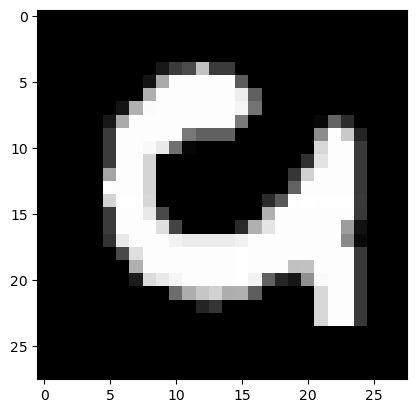

numero 8 scambiato con 0


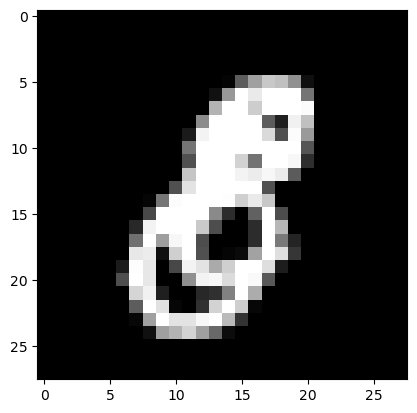

numero 2 scambiato con 8


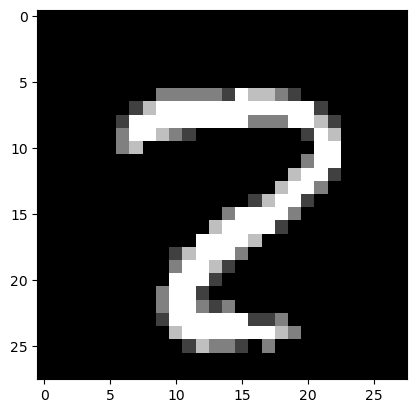

numero 7 scambiato con 4


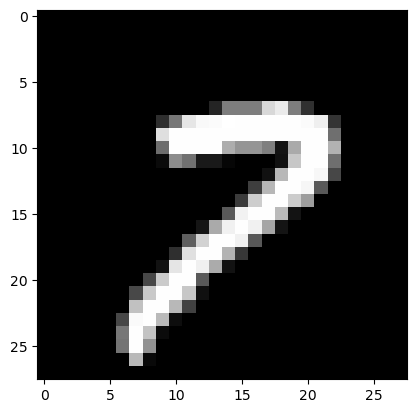

numero 5 scambiato con 3


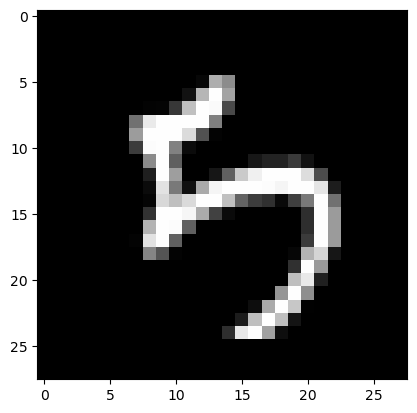

numero 9 scambiato con 1


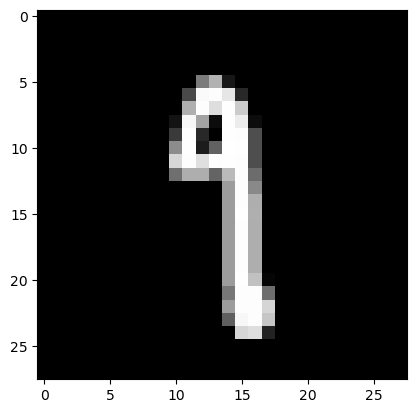

numero 9 scambiato con 4


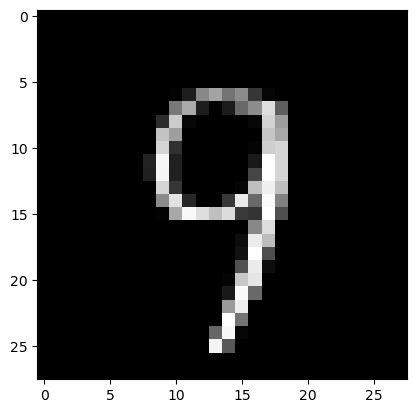

numero 5 scambiato con 3


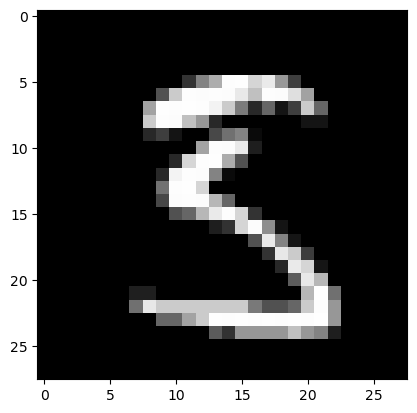

numero 7 scambiato con 1


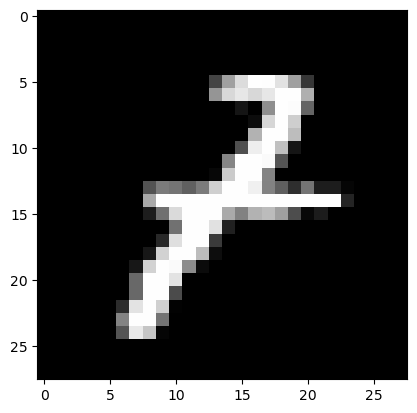

numero 9 scambiato con 0


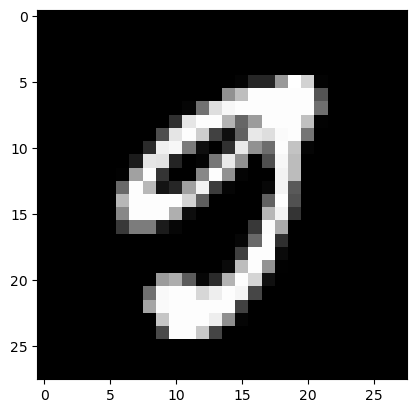

numero 6 scambiato con 1


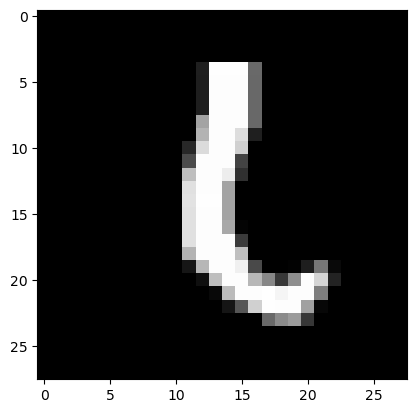

numero 7 scambiato con 3


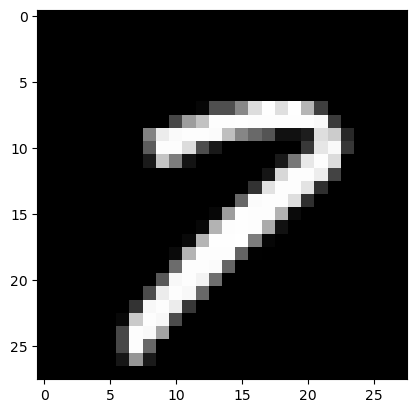

numero 9 scambiato con 4


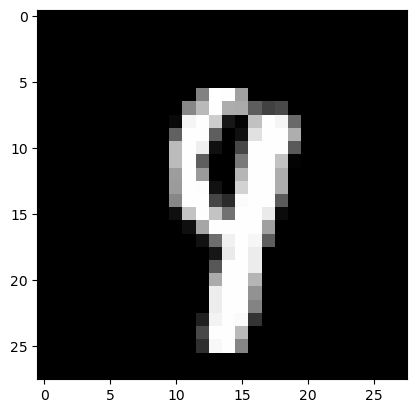

numero 6 scambiato con 5


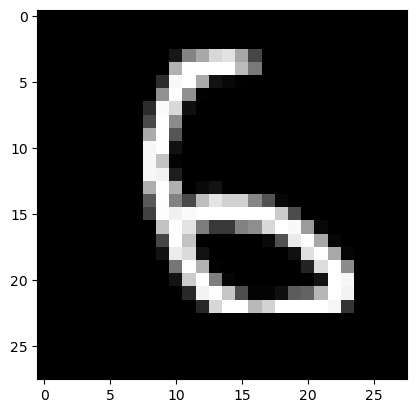

numero 5 scambiato con 3


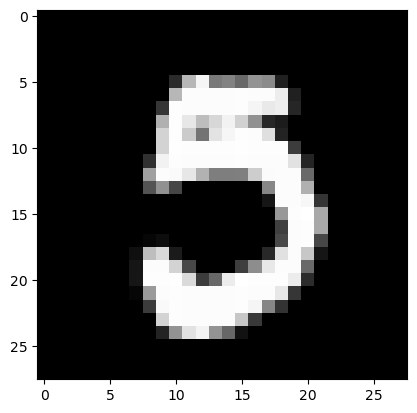

numero 9 scambiato con 4


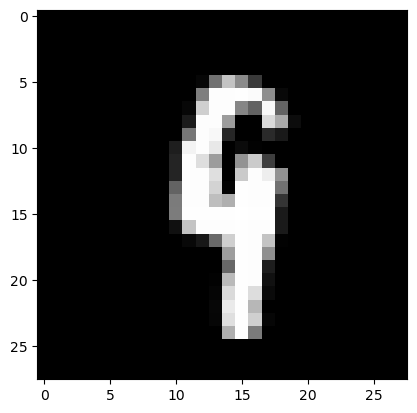

numero 3 scambiato con 2


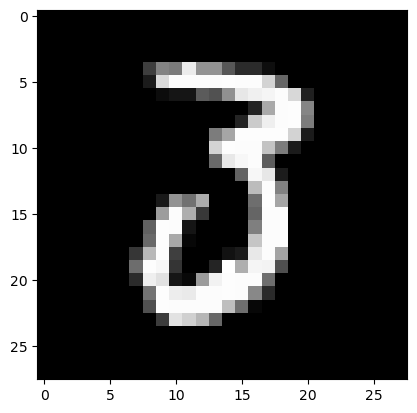

numero 3 scambiato con 2


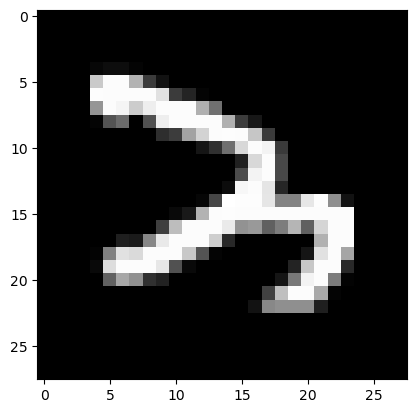

numero 9 scambiato con 5


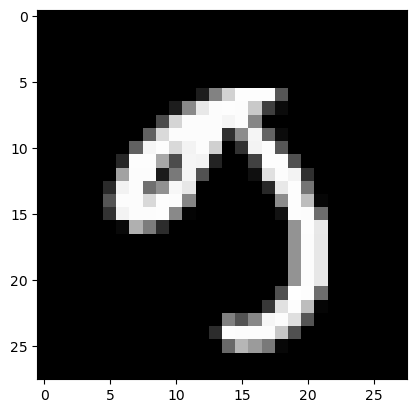

numero 8 scambiato con 3


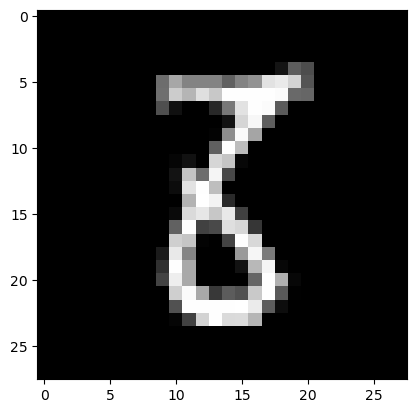

numero 1 scambiato con 2


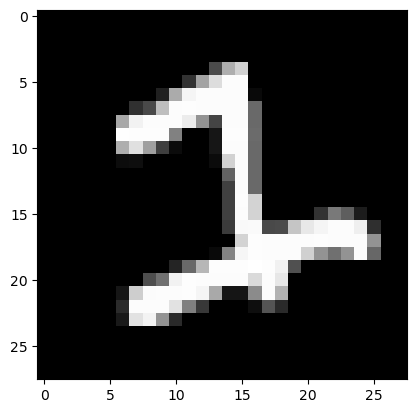

numero 5 scambiato con 9


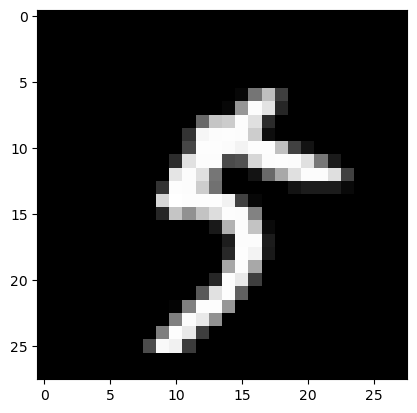

numero 7 scambiato con 9


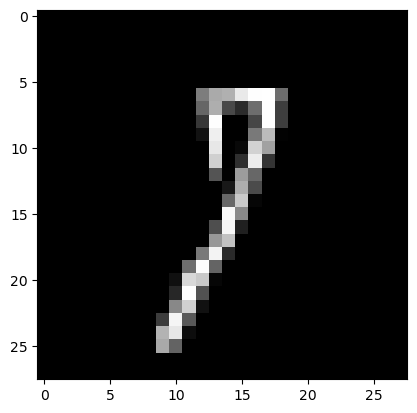

numero 7 scambiato con 9


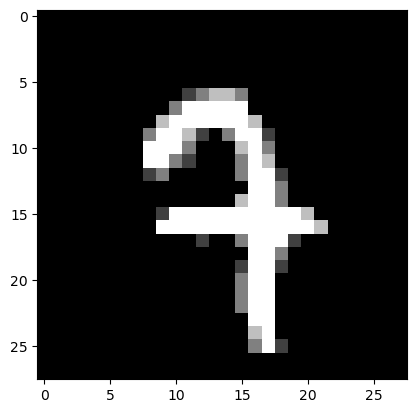

numero 4 scambiato con 9


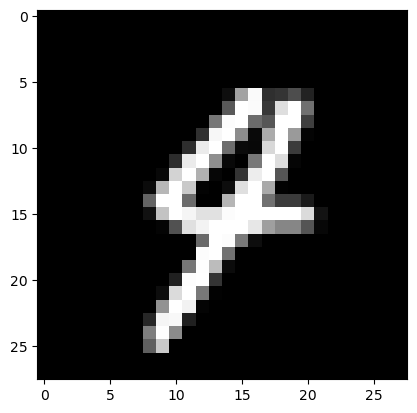

numero 6 scambiato con 0


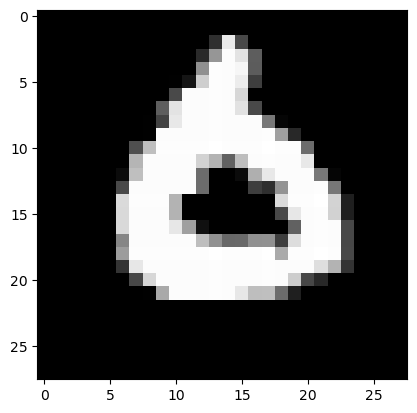

numero 7 scambiato con 8


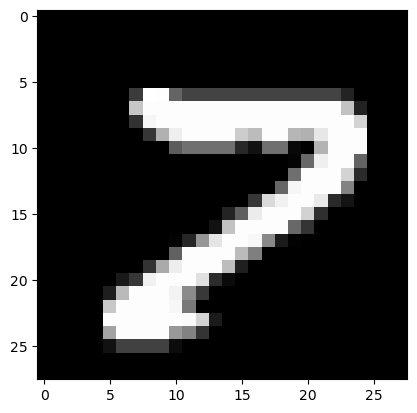

numero 7 scambiato con 9


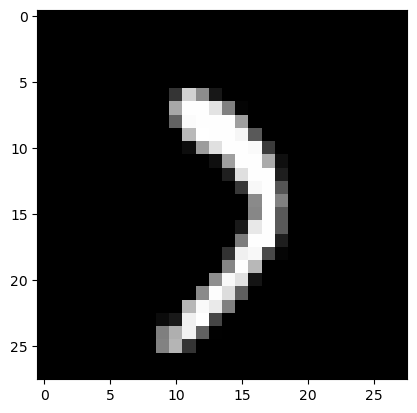

numero 2 scambiato con 1


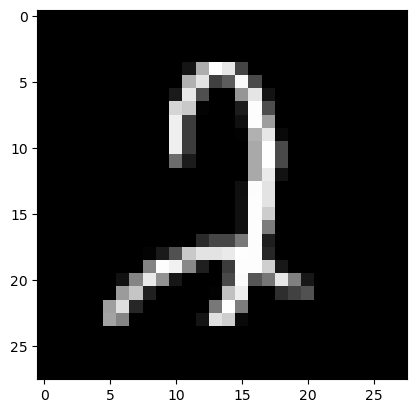

numero 3 scambiato con 9


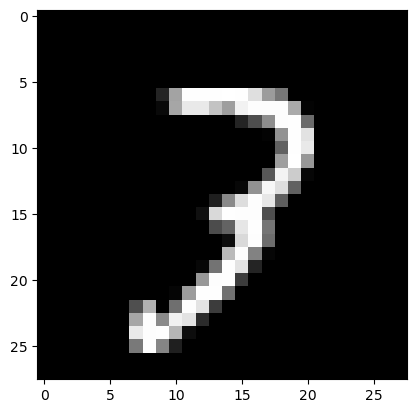

numero 9 scambiato con 1


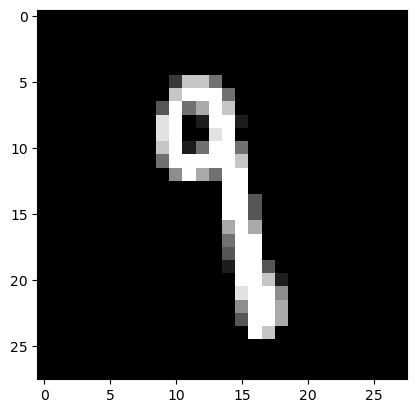

numero 6 scambiato con 4


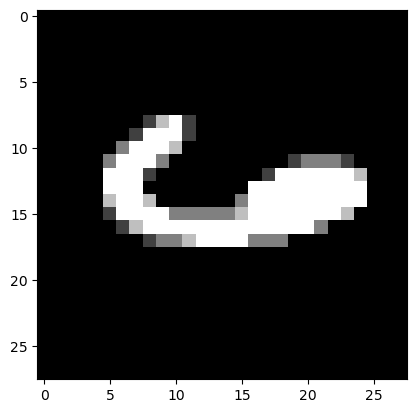

numero 5 scambiato con 0


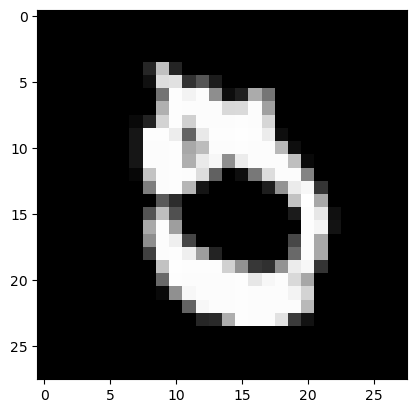

numero 8 scambiato con 5


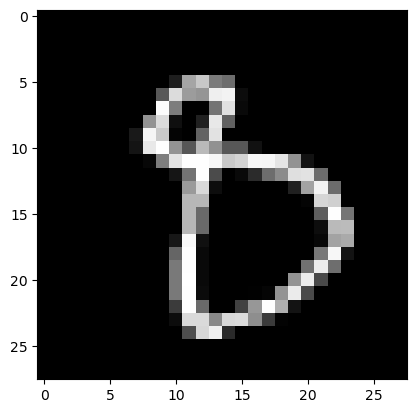

numero 9 scambiato con 3


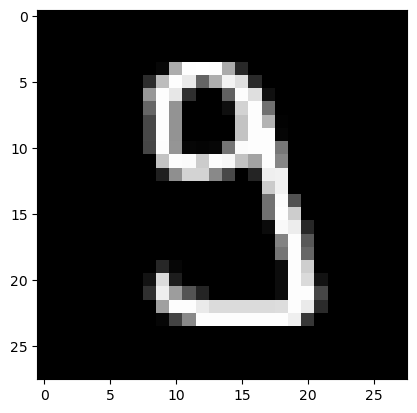

numero 7 scambiato con 0


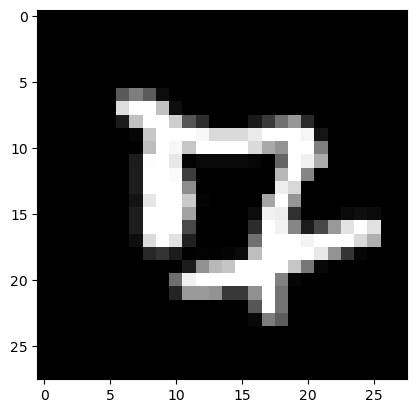

numero 8 scambiato con 4


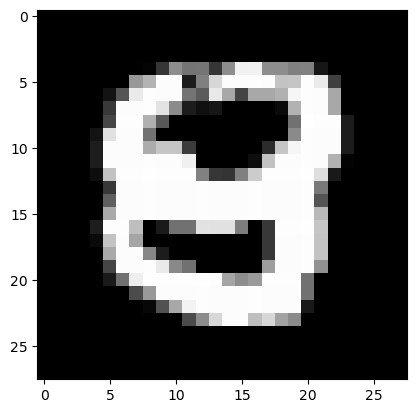

numero 7 scambiato con 2


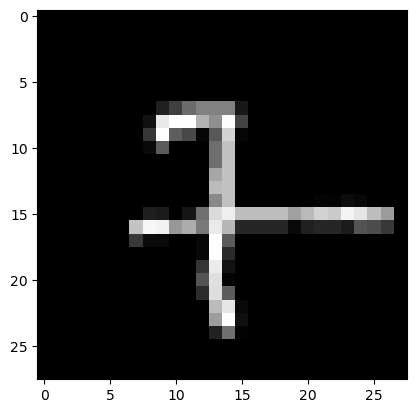

numero 8 scambiato con 3


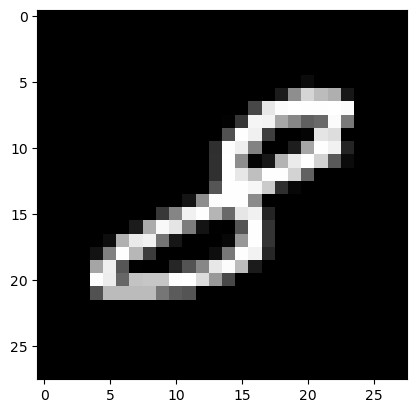

numero 6 scambiato con 8


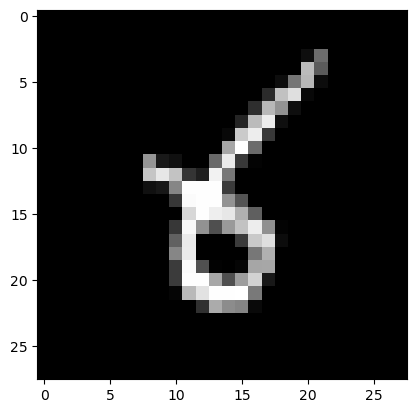

numero 5 scambiato con 8


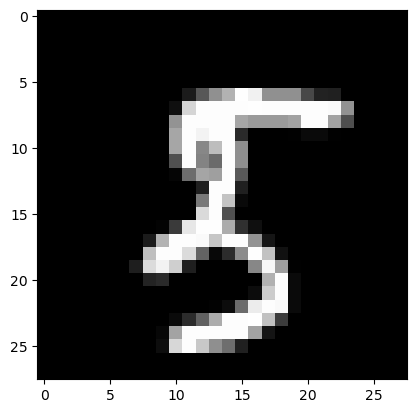

numero 7 scambiato con 8


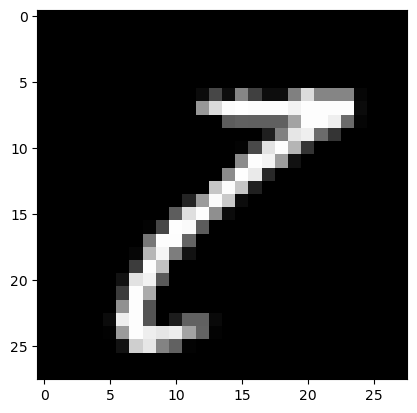

numero 0 scambiato con 4


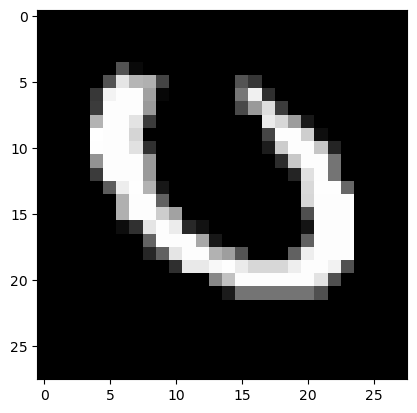

numero 5 scambiato con 3


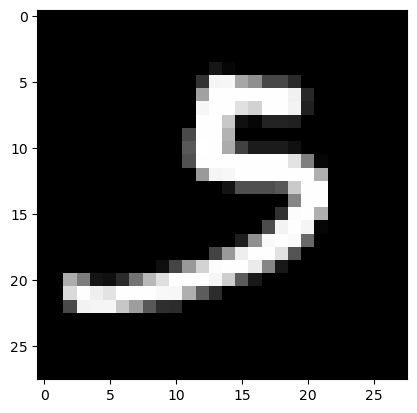

numero 9 scambiato con 4


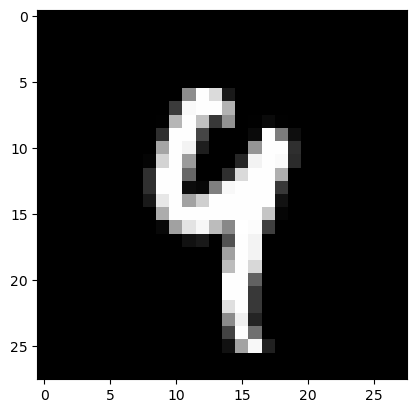

numero 0 scambiato con 3


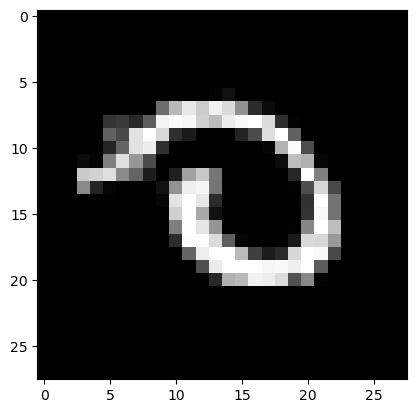

numero 9 scambiato con 3


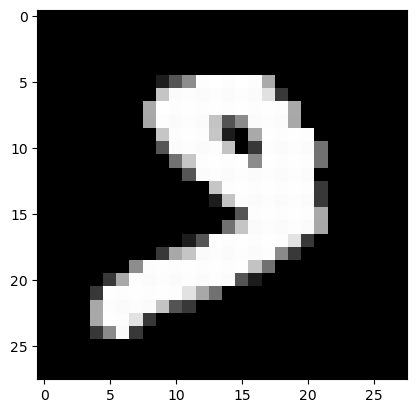

numero 8 scambiato con 2


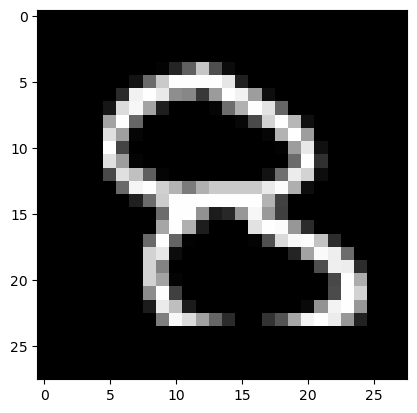

numero 7 scambiato con 4


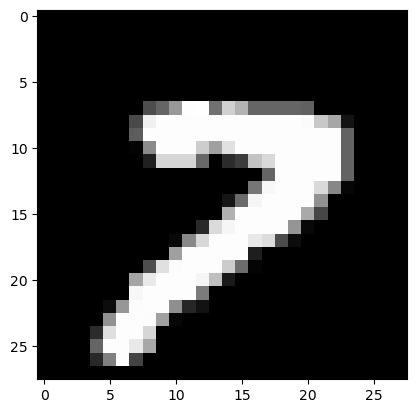

numero 9 scambiato con 0


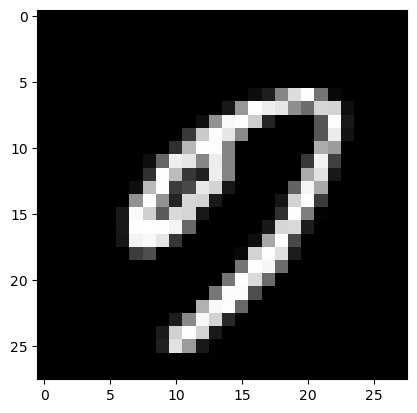

numero 7 scambiato con 9


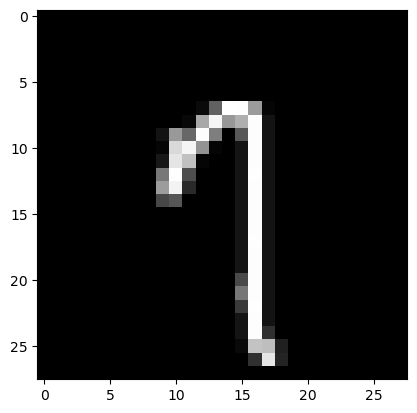

numero 6 scambiato con 5


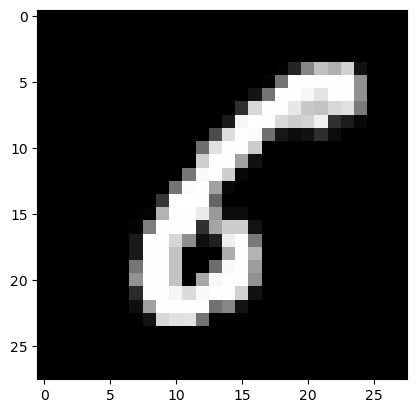

numero 2 scambiato con 8


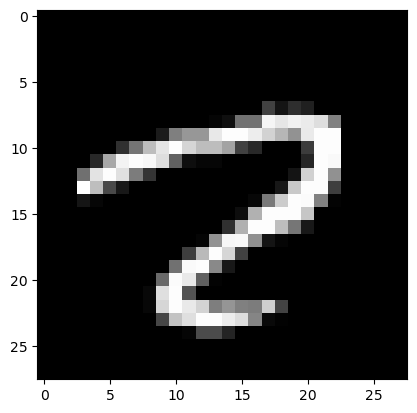

numero 5 scambiato con 3


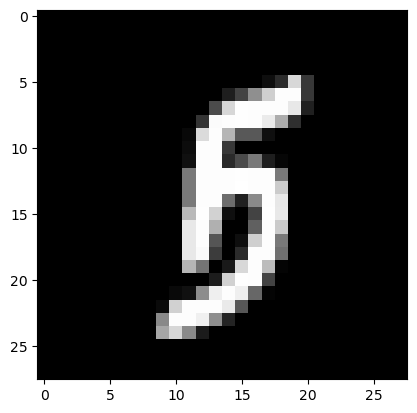

numero 7 scambiato con 4


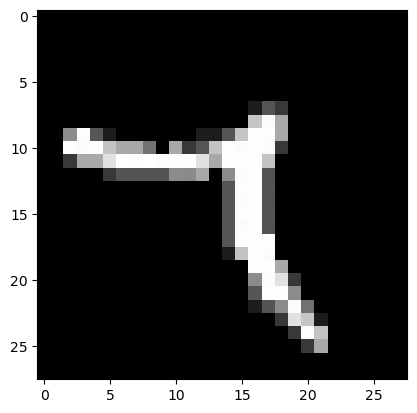

numero 8 scambiato con 7


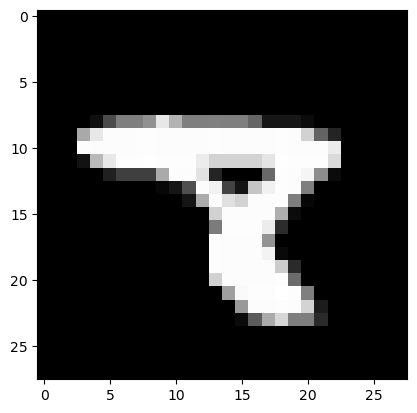

numero 9 scambiato con 1


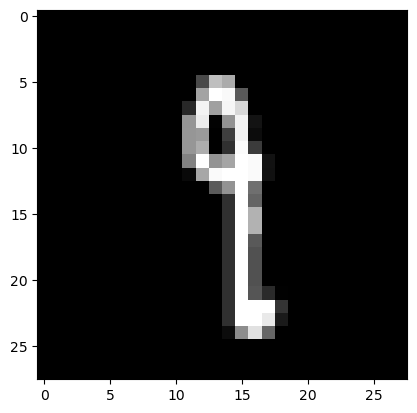

numero 6 scambiato con 5


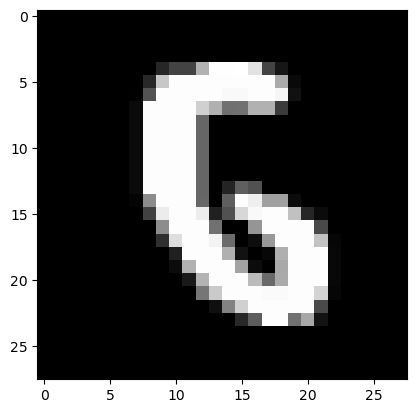

numero 6 scambiato con 8


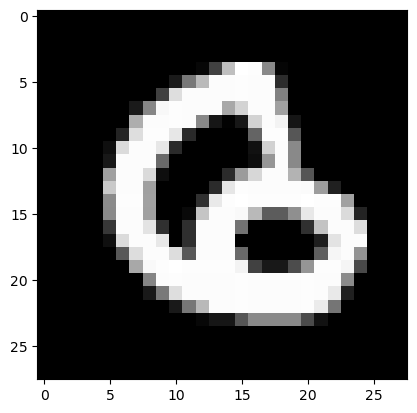

numero 8 scambiato con 9


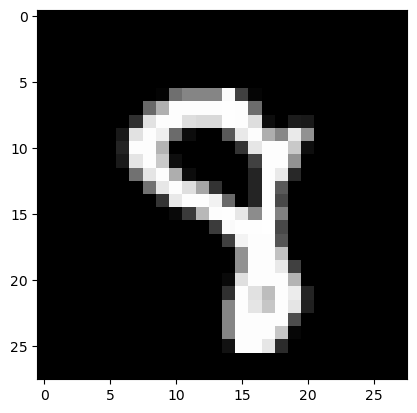

numero 8 scambiato con 3


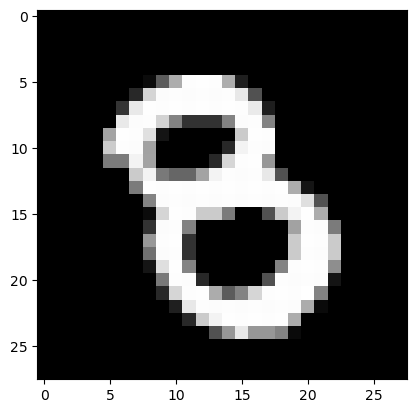

numero 7 scambiato con 9


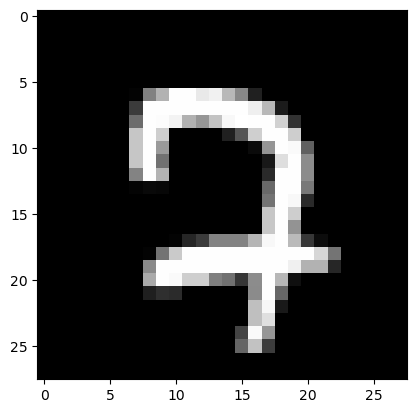

numero 8 scambiato con 0


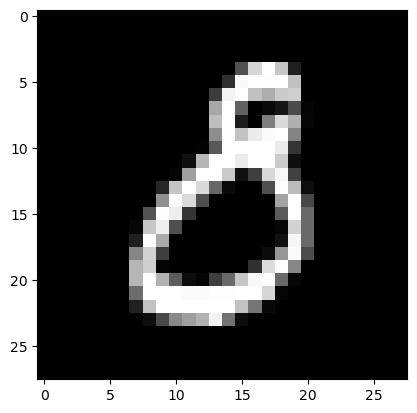

numero 6 scambiato con 4


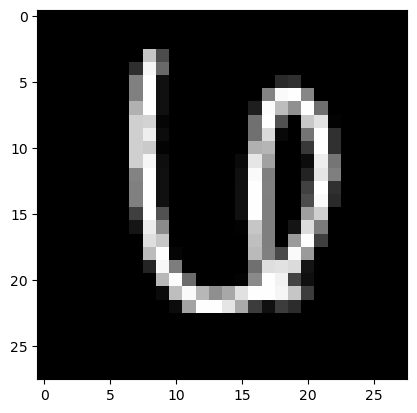

numero 9 scambiato con 4


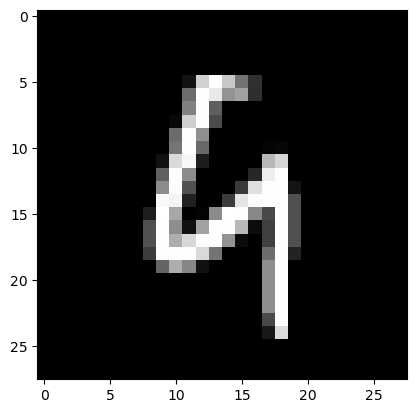

numero 4 scambiato con 9


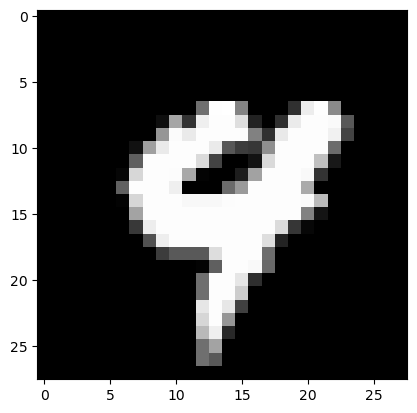

numero 0 scambiato con 8


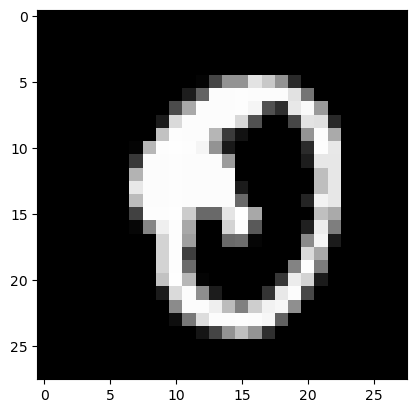

numero 7 scambiato con 3


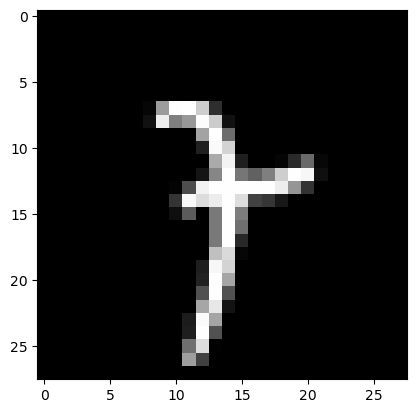

numero 1 scambiato con 6


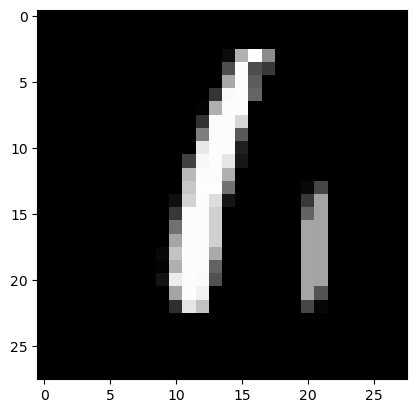

numero 1 scambiato con 0


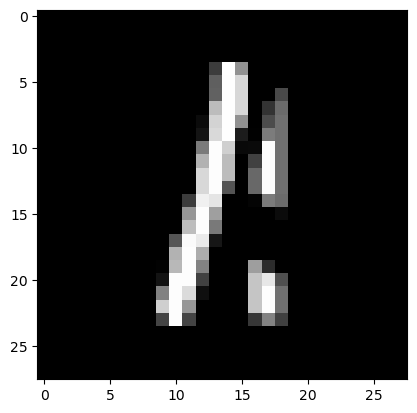

numero 8 scambiato con 0


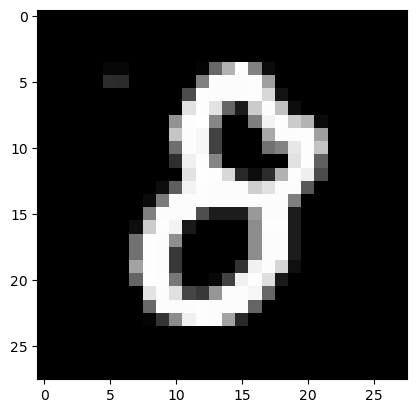

numero 4 scambiato con 2


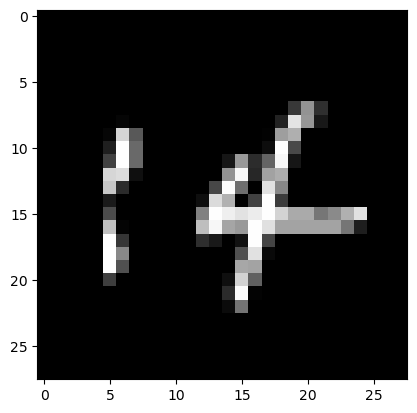

numero 3 scambiato con 2


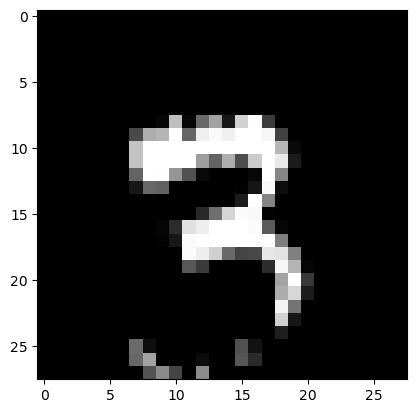

numero 6 scambiato con 0


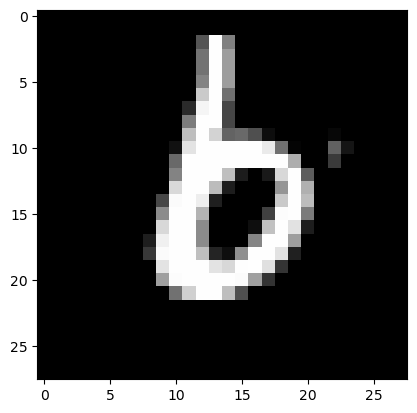

numero 4 scambiato con 9


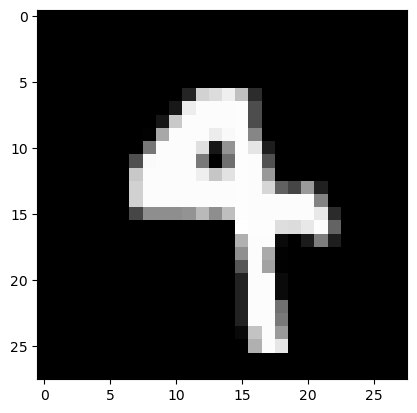

numero 5 scambiato con 3


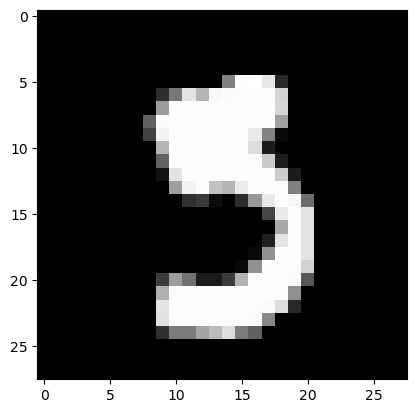

numero 3 scambiato con 8


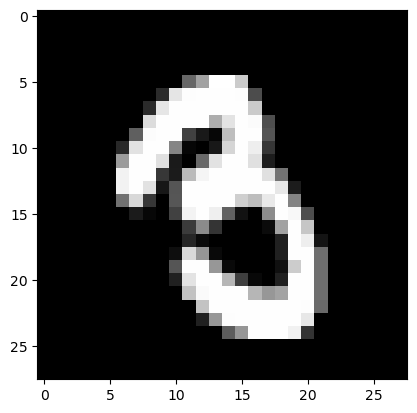

numero 5 scambiato con 3


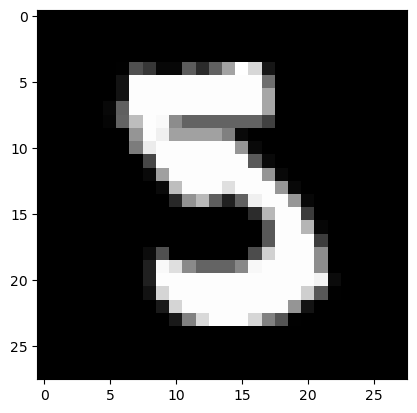

numero 8 scambiato con 3


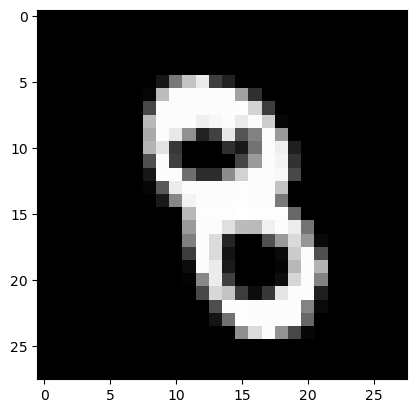

numero 9 scambiato con 3


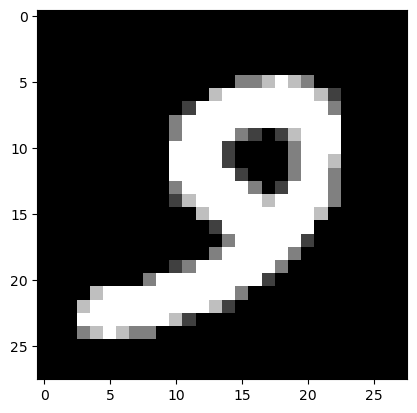

numero 8 scambiato con 9


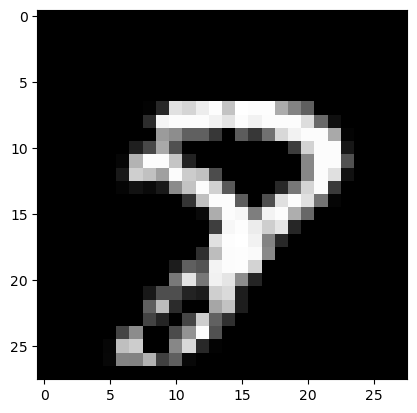

numero 7 scambiato con 1


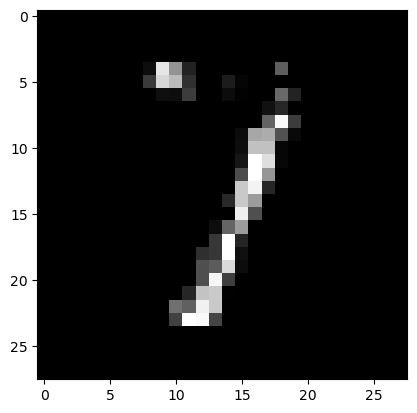

numero 0 scambiato con 9


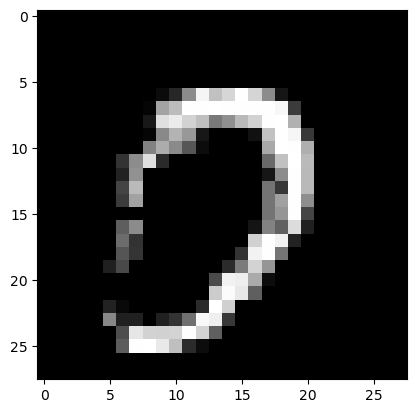

numero 5 scambiato con 3


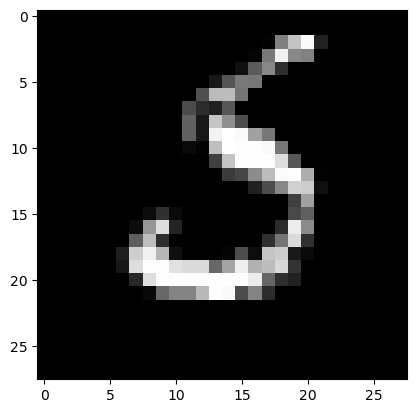

numero 8 scambiato con 1


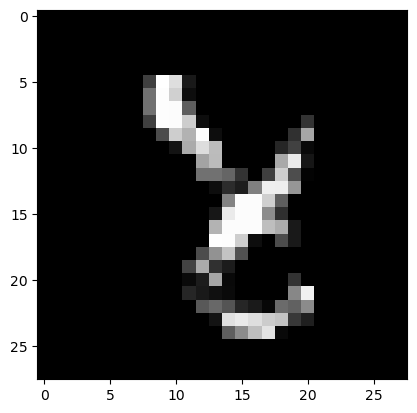

numero 9 scambiato con 5


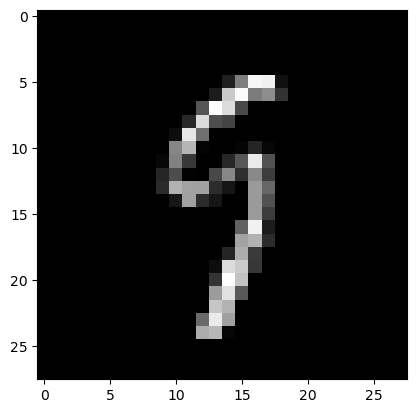

numero 8 scambiato con 9


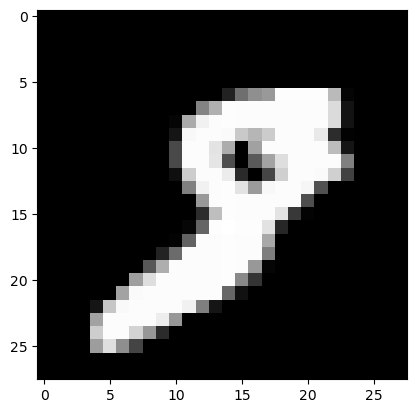

numero 1 scambiato con 3


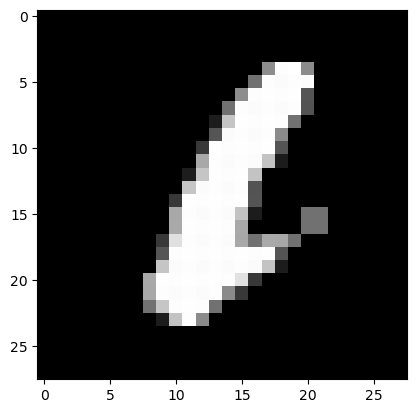

numero 7 scambiato con 8


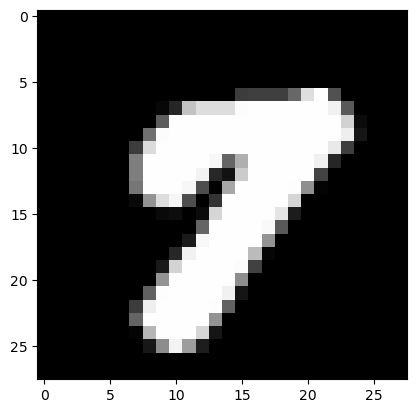

numero 8 scambiato con 0


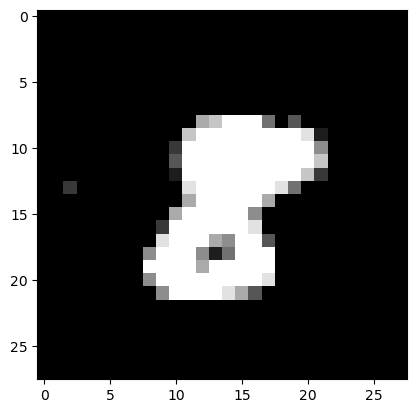

numero 2 scambiato con 8


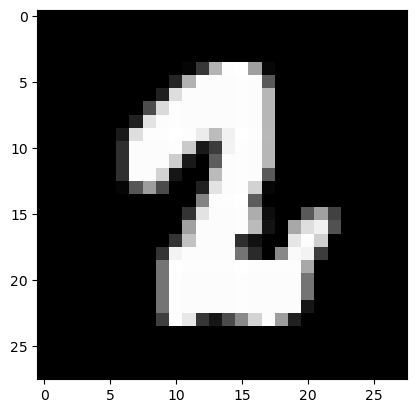

numero 2 scambiato con 8


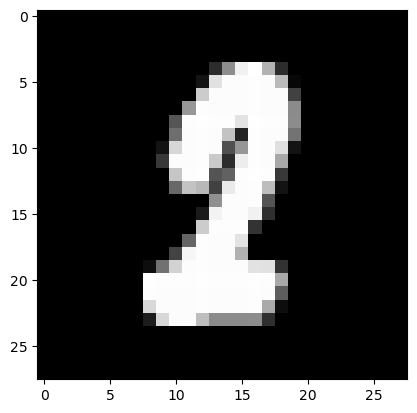

numero 3 scambiato con 9


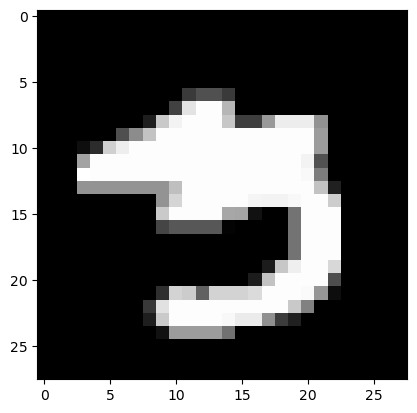

numero 7 scambiato con 2


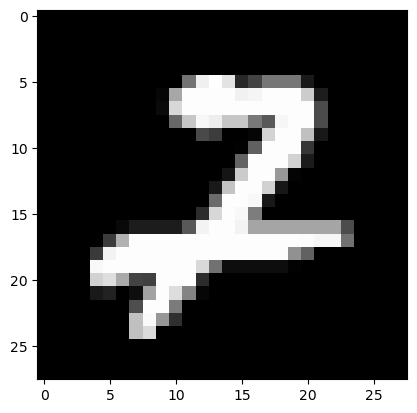

numero 7 scambiato con 2


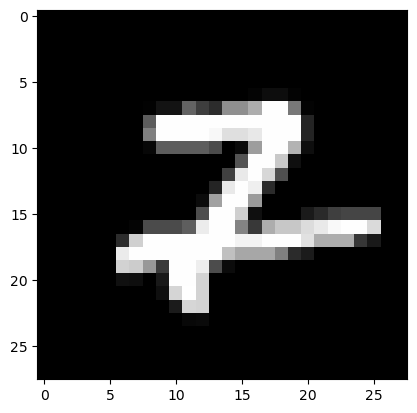

numero 7 scambiato con 2


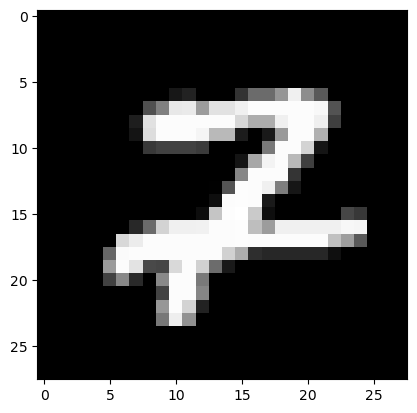

numero 7 scambiato con 2


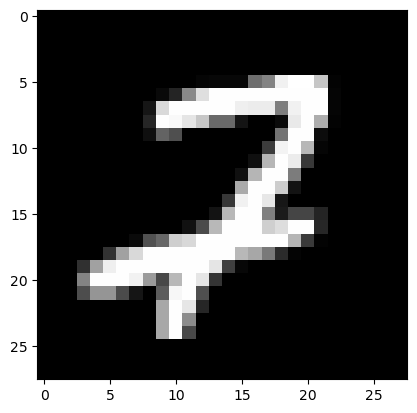

numero 9 scambiato con 4


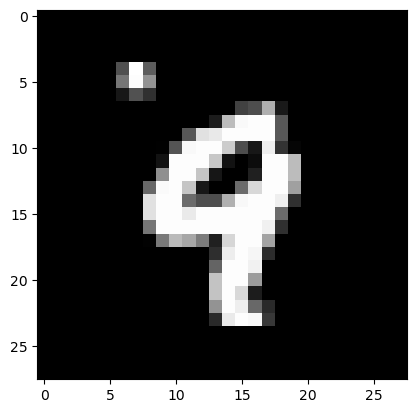

numero 0 scambiato con 1


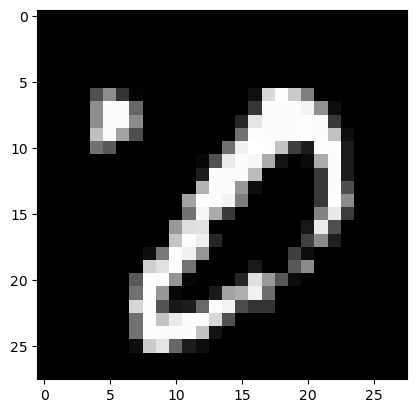

numero 2 scambiato con 7


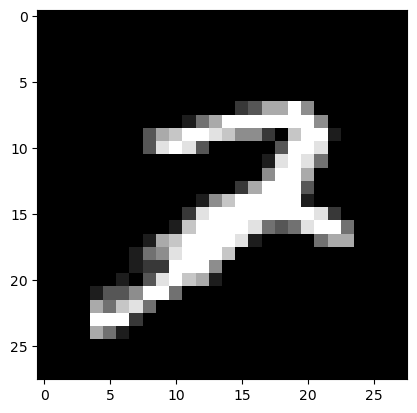

numero 6 scambiato con 3


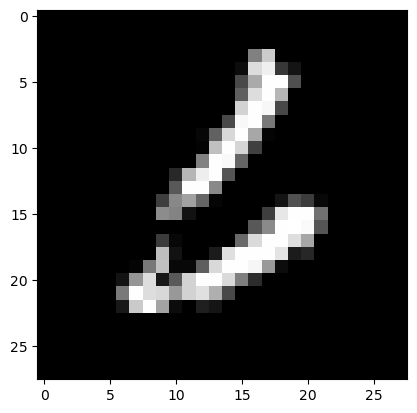

numero 2 scambiato con 8


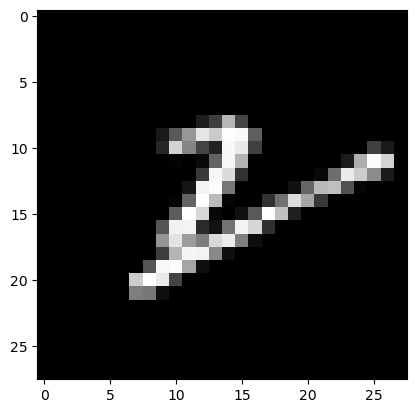

numero 5 scambiato con 6


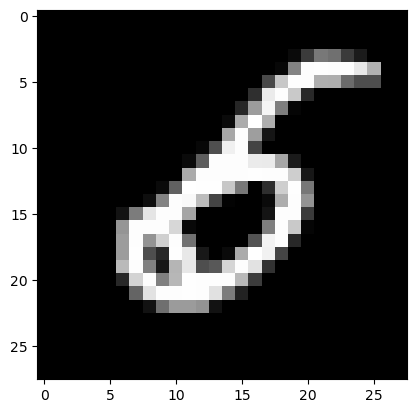

numero 4 scambiato con 2


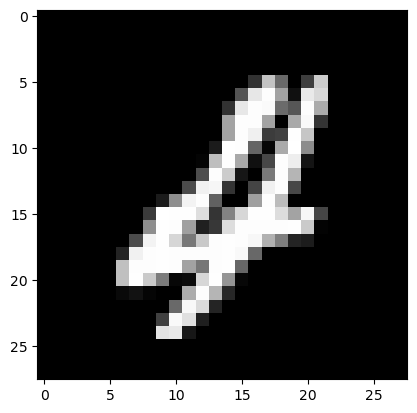

numero 2 scambiato con 0


KeyboardInterrupt: 

In [23]:
#vediamo gli esempi che la rete neurale ha fallito a classificare
for i in range(len(X_test)):
    if Y_test[i] != y_pred[i]:
        print("numero %d scambiato con %d" %(Y_test[i], y_pred[i]))
        plt.imshow(X_test[i].reshape([28,28]) , cmap="grey")
        plt.show()                                              #OTTIMO LAVORO, ALCUNI ESEMPI SONO DIFFICILI DA CLASSIFICARE ANCHE PER UN UMANO